<a href="https://colab.research.google.com/github/gyyang/neurogym/blob/master/neurogym/examples/example_NeuroGym_stable_baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuroGym

NeuroGym is a comprehensive toolkit that allows training any network model on many established neuroscience tasks using Reinforcement Learning techniques. It includes working memory tasks, value-based decision tasks and context-dependent perceptual categorization tasks.

In this notebook we first show how to install the relevant toolbox. 

We then show how to access the available tasks and their relevant information.

Finally we train an LSTM network on the Random Dots Motion task using the A2C algorithm [Mnih et al. 2016](https://arxiv.org/abs/1602.01783) implemented in the [stable-baselines](https://github.com/hill-a/stable-baselines) toolbox, and plot the results.

You can easily change the code to train a network on any other available task or using a different algorithm (e.g. ACER, PPO2).

TODO: Make this not just usable in google colab

### Installation

In [1]:
%tensorflow_version 1.x
# Install gym
! pip install gym
# Install neurogym
! git clone https://github.com/gyyang/neurogym.git
! pip install -e neurogym
# Install stable-baselines
! git clone https://github.com/hill-a/stable-baselines.git
! apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
# ! cd stable-baselines/
! pip install --upgrade stable-baselines

fatal: destination path 'neurogym' already exists and is not an empty directory.
Obtaining file:///content/neurogym
  Found existing installation: neurogym 0.0.1
    Can't uninstall 'neurogym'. No files were found to uninstall.
  Running setup.py develop for neurogym
fatal: destination path 'stable-baselines' already exists and is not an empty directory.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubunt

### Access tasks and wrappers info

In [2]:
from neurogym.meta import tasks_info
tasks_info.info()

### List of environments implemented


* 25 tasks implemented so far.


AngleReproduction-v0
AntiReach-v0
Bandit-v0
Combine-v0
DPA-v0
DawTwoStep-v0
DelayedMatchCategory-v0
DelayedMatchSample-v0
DelayedMatchToSampleDistractor1D-v0
DelayedResponse-v0
Detection-v0
GNG-v0
IntervalDiscrimination-v0
Mante-v0
MatchingPenny-v0
MemoryRecall-v0
MotorTiming-v0
NAltRDM-v0
RDM-v0
Reaching1D-v0
Reaching1DWithSelfDistraction-v0
ReadySetGo-v0
Romo-v0
padoaSch-v0
pdWager-v0



### Get information about specific task

#### Example trials ####


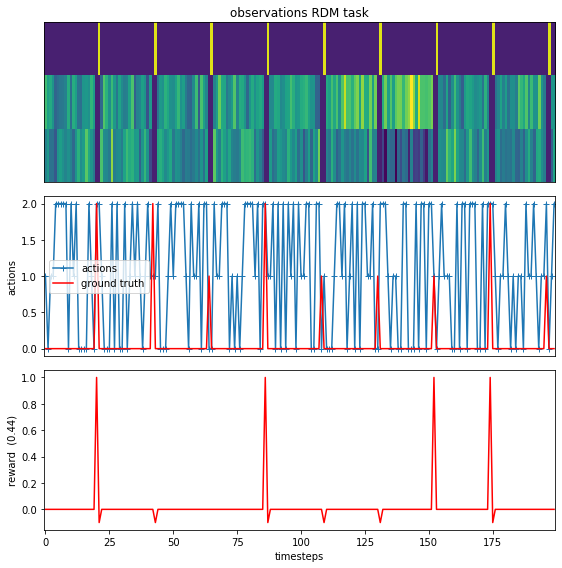

### RDM task ###

Logic: Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average

Reference paper: 

[The analysis of visual motion: a comparison of
        neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)

Default Epoch timing (ms) 

fixation : constant 100

stimulus : constant 2000

decision : constant 100

stimEv : Controls the difficulty of the experiment. (def: 1.)


#### Source code #### 

class RDM(ngym.EpochEnv):
    metadata = {
        'description': '''Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average''',
        'paper_link': 'https://www.jneurosci.org/content/12/12/4745',
        'paper_name': '''The analysis of visual motion: a comparison of
        neuronal and psychophysical performance''',
        'timing'

In [3]:
tasks_info.info('RDM-v0', show_code=True, show_fig=True)

### Get list of available wrappers

In [4]:
tasks_info.info_wrapper()

### List of wrappers implemented


* 9 wrappers implemented so far.


CatchTrials-v0
MissTrialReward-v0
Monitor-v0
Noise-v0
PassAction-v0
PassReward-v0
ReactionTime-v0
SideBias-v0
TrialHistory-v0



### Get information about specific wrapper

In [5]:
tasks_info.info_wrapper('Monitor-v0', show_code=True)

### Monitor-v0 wrapper ###

Logic: Saves relevant behavioral information: rewards, actions, observations, new trial, ground truth

Input parameters: 

folder : Folder where the data will be saved. (def: None)

num_tr_save : Data will be saved every num_tr_save trials.
        (def: 100000)


#### Source code #### 

class Monitor(Wrapper):
    metadata = {
        'description': 'Saves relevant behavioral information: rewards,' +
        ' actions, observations, new trial, ground truth',
        'paper_link': None,
        'paper_name': None,
        'folder': 'Folder where the data will be saved. (def: None)',
        'num_tr_save': '''Data will be saved every num_tr_save trials.
        (def: 100000)''',
    }

    def __init__(self, env, folder=None, num_tr_save=100000):
        Wrapper.__init__(self, env=env)
        self.env = env
        self.num_tr = 0
        # data to save
        self.choice_mat = []
        self.gt_mat = []
        self.stim_mat = []
        self.reward_mat =

# Example

In [0]:
import gym
import neurogym
from neurogym.wrappers import trial_hist
from neurogym.meta import tasks_info
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
task = 'RDM-v0'
KWARGS = {'dt': 100, 'timing': {'fixation': ('constant', 200), 'stimulus': ('constant', 500), 'decision': ('constant', 200)}}

env = gym.make('RDM-v0', **KWARGS)
# env = trial_hist.TrialHistory(env, rep_prob=(.1, .9), block_dur=50)
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])

model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
model.learn(total_timesteps=500000, log_interval=10000)
env.close()

# Visualize results

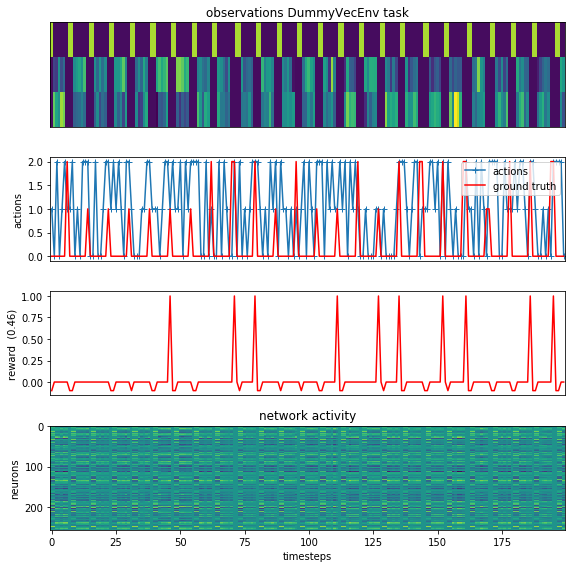

In [7]:
env = gym.make('RDM-v0', **KWARGS)
env = DummyVecEnv([lambda: env])
data = tasks_info.plot_struct(env, num_steps_env=10000, n_stps_plt=200,
                                model=model)
